# Meshing

The point of the computational mesh is to discretize the superconducting films we wish to model

In [3]:
%config InlineBackend.figure_formats = {"retina", "png"}
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

logging.basicConfig(level=logging.INFO)

import superscreen as sc
from superscreen.geometry import circle, box

In [14]:
length_units = "um"
ro = 3  # outer radius
ri = 0.5  # inner radius
slit_width = 0.25
layer = sc.Layer("base", Lambda=1, z0=0)

ring = circle(ro)
hole = circle(ri)
slit = box(slit_width, 1.5 * (ro - ri), center=(0, -(ro + ri) / 2))

# film = sc.Polygon.from_difference([ring, slit, hole], name="ring_with_slit", layer="base")
film = sc.Polygon.from_difference([ring], name="ring_with_slit", layer="base")

# film = film.resample(500)
bounding_box = sc.Polygon("bounding_box", layer="base", points=circle(1.2 * ro))

device = sc.Device(
    film.name,
    layers=[layer],
    films=[film],
    abstract_regions=[bounding_box],
    length_units=length_units,
)

INFO:superscreen.device.device:Generating mesh...
INFO:superscreen.device.device:Finished generating mesh with 3233 points and 6275 triangles.
INFO:superscreen.device.device:Calculating weight matrix.
INFO:superscreen.device.device:Calculating Laplace operator.
INFO:superscreen.device.device:Calculating kernel matrix.


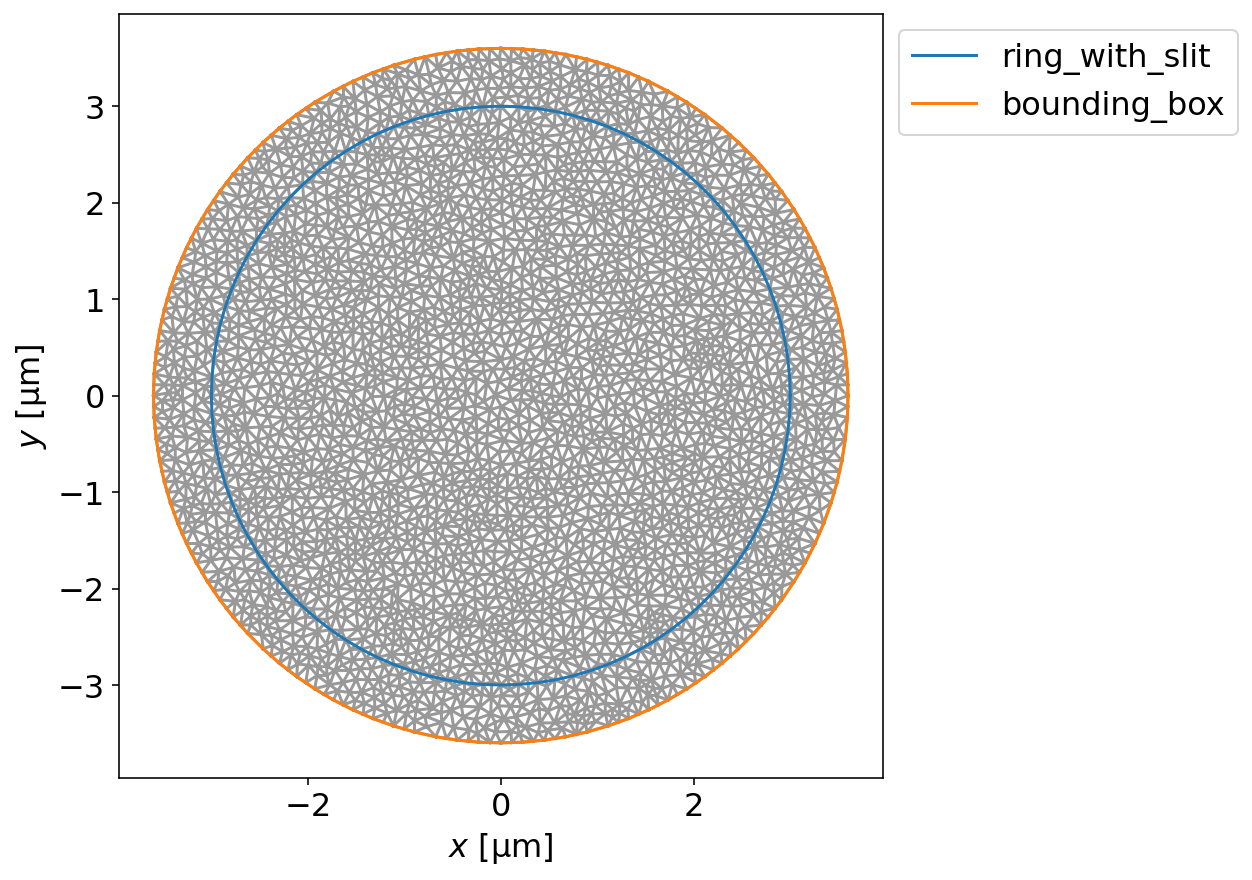

In [16]:
device.make_mesh(min_points=3_000, optimesh_steps=None)
fig, ax = device.plot(mesh=True, mesh_kwargs=dict(color="k", alpha=0.4))